<a href="https://colab.research.google.com/github/dkmau2004/Content/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Modelling Titanic Survival

##Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import xgboost as xgb
from xgboost import XGBRegressor, plot_importance, XGBClassifier

from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import shap

##Reading Files

In [2]:
train_df, test_df = train_test_split(pd.read_csv('/content/train.csv'), test_size=0.2, random_state=42)

##Analysis Of DataSet

In [3]:
print("Dataset of train:")
display(train_df) #Showing the contents of the datasheet

Dataset of train:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
331,332,0,1,"Partner, Mr. Austen",male,45.5,0,0,113043,28.5000,C124,S
733,734,0,2,"Berriman, Mr. William John",male,23.0,0,0,28425,13.0000,NaN,S
382,383,0,3,"Tikkanen, Mr. Juho",male,32.0,0,0,STON/O 2. 3101293,7.9250,NaN,S
704,705,0,3,"Hansen, Mr. Henrik Juul",male,26.0,1,0,350025,7.8542,NaN,S
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.2750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
106,107,1,3,"Salkjelsvik, Miss. Anna Kristine",female,21.0,0,0,343120,7.6500,NaN,S
270,271,0,1,"Cairns, Mr. Alexander",male,NaN,0,0,113798,31.0000,NaN,S
860,861,0,3,"Hansen, Mr. Claus Peter",male,41.0,2,0,350026,14.1083,NaN,S
435,436,1,1,"Carter, Miss. Lucile Polk",female,14.0,1,2,113760,120.0000,B96 B98,S


In [4]:
print("Dataset of test:")
display(test_df)

Dataset of test:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
709,710,1,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.2458,NaN,C
439,440,0,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,C.A. 18723,10.5000,NaN,S
840,841,0,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.0,0,0,SOTON/O2 3101287,7.9250,NaN,S
720,721,1,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.0,0,1,248727,33.0000,NaN,S
39,40,1,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
433,434,0,3,"Kallio, Mr. Nikolai Erland",male,17.0,0,0,STON/O 2. 3101274,7.1250,NaN,S
773,774,0,3,"Elias, Mr. Dibo",male,NaN,0,0,2674,7.2250,NaN,C
25,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,NaN,S
84,85,1,2,"Ilett, Miss. Bertha",female,17.0,0,0,SO/C 14885,10.5000,NaN,S


In [5]:
print("Summary Statitics of train ")
display(train_df.describe())

Summary Statitics of train 


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,572.000000,712.000000,712.000000,712.000000
mean,448.234551,0.376404,2.330056,29.498846,0.553371,0.379213,32.586276
std,256.731423,0.484824,0.824584,14.500059,1.176404,0.791669,51.969529
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.750000,0.000000,2.000000,21.000000,0.000000,0.000000,7.925000
50%,453.500000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,673.500000,1.000000,3.000000,38.000000,1.000000,0.000000,30.500000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


###Missing Values

In [6]:
missing = train_df.isna().sum() #isna checks if the dataset has a null or missing values, which are then summed up under each column
missing = missing[missing > 0].sort_values(ascending=False) #sorts the dataset of missing in descending order and removing zero values

In [7]:
missing_pcg = train_df.isna().mean() * 100 #mean percentage of the missing values
missing_pcg = missing_pcg[missing_pcg > 0].sort_values(ascending=False)

In [8]:
missing_table = pd.DataFrame({"missing_value": missing, "missing_percentage": missing_pcg}) #grouping the value of missing and the percentage of missing into one table
print("Columns with missing values:\n")
display(missing_table)

Columns with missing values:



,missing_value,missing_percentage
Cabin,553,77.668539
Age,140,19.662921
Embarked,2,0.280899


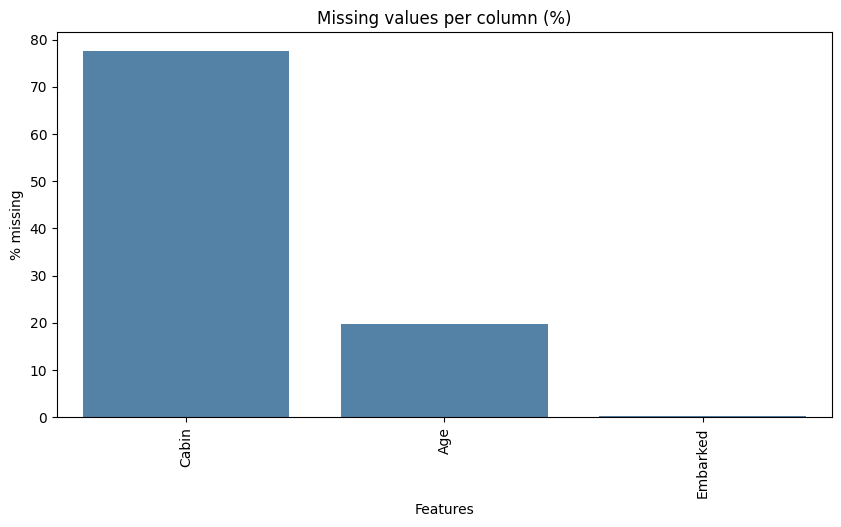

In [9]:
# plotting percentage of missing values for each column
plt.figure(figsize=(10,5))
sns.barplot(x=missing.index, y=missing_pcg, color="steelblue")
plt.xticks(rotation=90)
plt.ylabel("% missing")
plt.xlabel("Features")
plt.title("Missing values per column (%)")
plt.show()

In [10]:
train_df["Age"] = train_df["Age"].fillna(train_df["Age"].median())
test_df["Age"]  = test_df["Age"].fillna(test_df["Age"].median())

train_df["Embarked"] = train_df["Embarked"].fillna(train_df["Embarked"].mode()[0])
test_df["Fare"] = test_df["Fare"].fillna(test_df["Fare"].median())

###Survival Rates

#### Generic Survival Rates

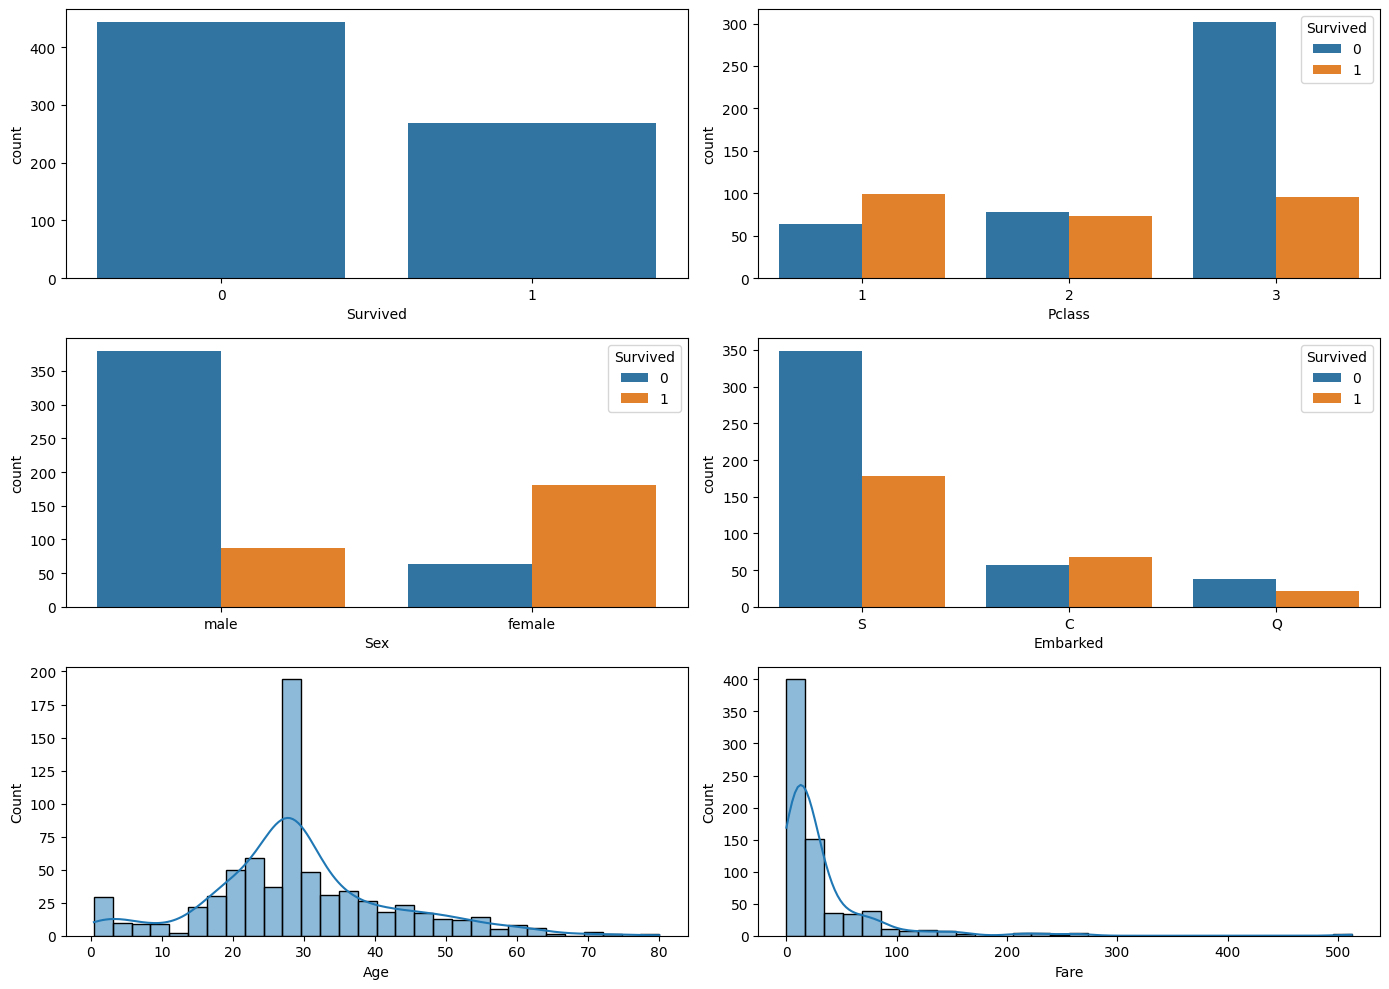

In [11]:
plt.figure(figsize=(14,10))

plt.subplot(3,2,1)
sns.countplot(data=train_df,x='Survived')

plt.subplot(3,2,2)
sns.countplot(data=train_df,x='Pclass',hue='Survived')

plt.subplot(3,2,3)
sns.countplot(data=train_df,x='Sex',hue='Survived')

plt.subplot(3,2,4)
sns.countplot(data=train_df,x='Embarked',hue='Survived')

plt.subplot(3,2,5)
sns.histplot(data=train_df,x='Age',kde=True,edgecolor="black",bins=30)

plt.subplot(3,2,6)
sns.histplot(data=train_df,x='Fare',kde=True,edgecolor="black",bins=30)

plt.tight_layout()
plt.show()

<Axes: xlabel='Sex', ylabel='Count'>

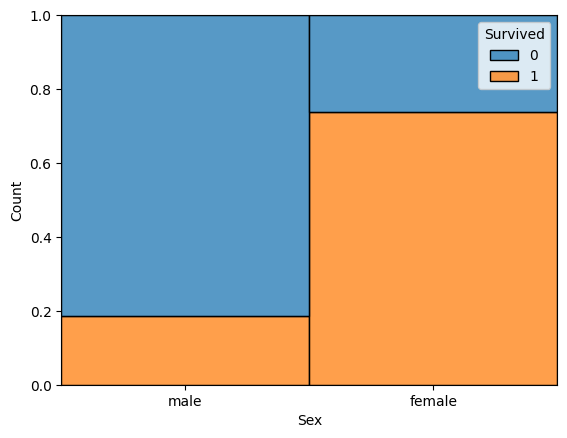

In [12]:
sns.histplot(data=train_df, x="Sex", hue="Survived", multiple="fill", discrete=True)

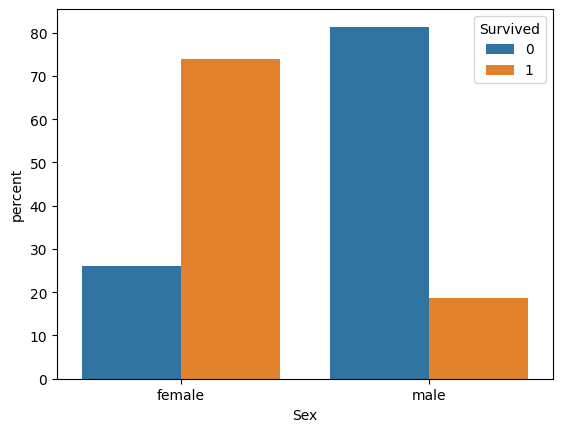

In [13]:
percent_df = (
    train_df.groupby("Sex")["Survived"]
    .value_counts(normalize=True)
    .mul(100)  # convert to %
    .rename("percent")
    .reset_index()
)

sns.barplot(data=percent_df, x="Sex", y="percent", hue="Survived")
plt.show()

In [14]:
print("Survival Rate :",np.round((train_df[train_df['Survived']==1].shape[0]/train_df['Survived'].shape[0])*100,2),"%")

Survival Rate : 37.64 %


####  Survival Percentages By Gender

In [15]:
sex_sur_count = train_df.groupby(["Sex", "Survived"]).size().unstack(fill_value=0)

# percentages relative to total males/females
women_sur_pcg = sex_sur_count.loc["female", 1] / sex_sur_count.loc["female"].sum() * 100
men_sur_pcg = sex_sur_count.loc["male", 1] / sex_sur_count.loc["male"].sum() * 100

print(f"Women survival rate: {women_sur_pcg:.2f}%")
print(f"Men survival rate:   {men_sur_pcg:.2f}%")

Women survival rate: 73.88%
Men survival rate:   18.63%


In [16]:
wo_sur_pcg = sex_sur_count.loc["female", 1] / sex_sur_count.loc["female"].sum() * 100
ma_sur_pcg = sex_sur_count.loc["male", 1] / sex_sur_count.loc["male"].sum() * 100


wo_not_sur_pcg = (sex_sur_count.loc["female", 0] /sex_sur_count.loc["female"].sum()) * 100
ma_not_sur_pcg = (sex_sur_count.loc["male", 0] / sex_sur_count.loc["male"].sum()) * 100

sur = pd.DataFrame({
    "Sex": ["Women", "Women", "Men", "Men"],
    "Survived": [1, 0, 1, 0],
    "Percentage": [wo_sur_pcg, wo_not_sur_pcg, ma_sur_pcg, ma_not_sur_pcg]
})

display(sur)

,Sex,Survived,Percentage
0,Women,1,73.877551
1,Women,0,26.122449
2,Men,1,18.629550
3,Men,0,81.370450


In [17]:
total_people = train_df.shape[0]

# Filter the DataFrame to get only women and men
women_df = train_df[train_df['Sex'] == 'female']
men_df = train_df[train_df['Sex'] == 'male']

# Calculate the percentage of women and men in the dataset
women_pcg = (women_df.shape[0] / total_people) * 100
men_pcg = (men_df.shape[0] / total_people) * 100

print(f"Percentage of women: {women_pcg:.2f}%")
print(f"Percentage of men:   {men_pcg:.2f}%")

Percentage of women: 34.41%
Percentage of men:   65.59%


#### Survival Percentage By Class

In [18]:
class_sur_count = train_df.groupby(["Pclass", "Survived"]).size().unstack(fill_value=0)

c1_sur_pcg = class_sur_count.loc[1, 1] / class_sur_count.loc[1].sum() * 100
c2_sur_pcg = class_sur_count.loc[2, 1] / class_sur_count.loc[2].sum() * 100
c3_sur_pcg = class_sur_count.loc[3, 1] / class_sur_count.loc[3].sum() * 100

c1_not_sur_pcg = class_sur_count.loc[1, 0] / class_sur_count.loc[1].sum() * 100
c2_not_sur_pcg = class_sur_count.loc[2, 0] / class_sur_count.loc[2].sum() * 100
c3_not_sur_pcg = class_sur_count.loc[3, 0] / class_sur_count.loc[3].sum() * 100

surclass = pd.DataFrame({
    "Pclass": [1, 1, 2, 2, 3, 3],
    "Survived": [1, 0, 1, 0, 1, 0],
    "Percentage": [c1_sur_pcg, c1_not_sur_pcg, c2_sur_pcg, c2_not_sur_pcg, c3_sur_pcg, c3_not_sur_pcg]
})

display(surclass)

,Pclass,Survived,Percentage
0,1,1,60.736196
1,1,0,39.263804
2,2,1,48.344371
3,2,0,51.655629
4,3,1,24.120603
5,3,0,75.879397


####Survival Percentage By Embarked

In [19]:
Em_sur_count = train_df.groupby(["Embarked", "Survived"]).size().unstack(fill_value=0)

s_sur_pcg = Em_sur_count.loc["S", 1] / Em_sur_count.loc["S"].sum() * 100
c_sur_pcg = Em_sur_count.loc["C", 1] / Em_sur_count.loc["C"].sum() * 100
q_sur_pcg = Em_sur_count.loc["Q", 1] / Em_sur_count.loc["Q"].sum() * 100

s_not_sur_pcg = Em_sur_count.loc["S", 0] / Em_sur_count.loc["S"].sum() * 100
c_not_sur_pcg = Em_sur_count.loc["C", 0] / Em_sur_count.loc["C"].sum() * 100
q_not_sur_pcg = Em_sur_count.loc["Q", 0] / Em_sur_count.loc["Q"].sum() * 100

sur_em = pd.DataFrame({
    "Pclass": ["S", "S", "C", "C", "Q", "Q"],
    "Survived": [1, 0, 1, 0, 1, 0],
    "Percentage": [s_sur_pcg, s_not_sur_pcg, c_sur_pcg, c_not_sur_pcg, q_sur_pcg, q_not_sur_pcg]
})

display(sur_em)

,Pclass,Survived,Percentage
0,S,1,33.776091
1,S,0,66.223909
2,C,1,54.400000
3,C,0,45.600000
4,Q,1,36.666667
5,Q,0,63.333333


##XGBoost Modelling

In [20]:
train_df = train_df.drop(columns=["Name", "Ticket", "Cabin"])
test_df  = test_df.drop(columns=["Name", "Ticket", "Cabin"])

In [21]:
# handelling missing values by placing the median and mode
train_df["Age"] = train_df["Age"].fillna(train_df["Age"].median())
test_df["Age"]  = test_df["Age"].fillna(test_df["Age"].median())

train_df["Fare"] = train_df["Fare"].fillna(train_df["Fare"].median())
test_df["Fare"]  = test_df["Fare"].fillna(test_df["Fare"].median())

train_df["Embarked"] = train_df["Embarked"].fillna(train_df["Embarked"].mode()[0])
test_df["Embarked"]  = test_df["Embarked"].fillna(test_df["Embarked"].mode()[0])

In [22]:
for col in ["Sex", "Embarked"]:
    le = LabelEncoder()
    train_df[col] = le.fit_transform(train_df[col].astype(str))
    test_df[col]  = le.transform(test_df[col].astype(str))

##

In [23]:
X = train_df.drop(["Survived", "PassengerId"], axis=1)
y = train_df["Survived"]

In [24]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [25]:
xgb_param_grid = {
    'learning_rate': [0.03, 0.034, 0.035, 0.036,0.04, 0.045],
    'n_estimators': [200, 225, 240, 250, 260, 275],
    'max_depth': [4, 5, 6, 7, 8, 9, 10],
    'min_child_weight': [1, 2, 3],
    'subsample': [0.3, 0.35, 0.4, 0.45, 0.5, 0.6, 0.65],
    'colsample_bytree': [0.6, 0.65, 0.7, 0.75, 0.8],
    'gamma': [0, 0.01, 0.1, 0.3, 0.5],
    'scale_pos_weight': [0, 1, 5, 10, 50, 100]
}

xgb_class = RandomizedSearchCV(XGBClassifier(random_state=42),
                            param_distributions=xgb_param_grid,
                            n_iter=200,
                            cv=5,
                            verbose=True,
                            n_jobs=-1,
                            random_state=42)


xgb_class.fit(X_train, y_train)

y_pred = xgb_class.predict(X_val)

print("Accuracy:", accuracy_score(y_val, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("\nClassification Report:\n", classification_report(y_val, y_pred))

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Accuracy: 0.8111888111888111

Confusion Matrix:
 [[75 12]
 [15 41]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.85        87
           1       0.77      0.73      0.75        56

    accuracy                           0.81       143
   macro avg       0.80      0.80      0.80       143
weighted avg       0.81      0.81      0.81       143



In [26]:
# Get the best hyperparameters from RandomizedSearchCV for XGBoost
best_params_xgb = xgb_class.best_params_

print("Best Hyperparameters for XGBoost:")
for param, value in best_params_xgb.items():
    print(f"  {param}: {value}")

Best Hyperparameters for XGBoost:
  subsample: 0.3
  scale_pos_weight: 1
  n_estimators: 275
  min_child_weight: 1
  max_depth: 7
  learning_rate: 0.035
  gamma: 0
  colsample_bytree: 0.65
